In [1]:
from numpy import random
from math import *
import math
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

Chambers, Mallows and Stuck method of simulating: $$ X \sim S_a(1,\beta,0 )$$

U - uniform random variable on (-pi/2, pi/2).
W - exponantialy distributed with mean = 1
Simulation of W is obrainted by inverse of cumulative distribution, eg. for given uniform ranodm U!, we have W = -logU!. For U ~ Uniform([0,1])

In [2]:
U = random.uniform(-pi/2, pi/2)
W = -log(random.uniform())
print(U)
print(W)

-1.3674688517628
1.1995953795291416


For alpha = 1

In [3]:
beta = 3


In [4]:
from math import pi, atan, tan, log, sin, cos, pow

def random_with_stable_distribution1(alpha, beta):
    pi = math.pi
    U = random.uniform(-math.pi/2, math.pi/2)
    W = -math.log(random.uniform())

    if alpha == 1:
        X = 2 / pi * ((pi / 2 + beta * U) * tan(U) - beta * log(pi / 2 * W * math.cos(U) /(pi/2 + beta * U)))
    
    else:
        Bab = atan(beta)*tan(pi * alpha / 2) / alpha
        Sab = pow(1 + beta**2 * tan(pi * alpha / 2) ** 2, 1 / 2 / alpha)

        X = Sab * sin(alpha * (U + Bab)) / pow(cos(U), 1/alpha) * pow(cos(U - alpha * (U + Bab)) / W, (1 - alpha)/alpha)    
    return X


In [5]:
print(random_with_stable_distribution1(0.4, 0))

3.3691866450982317


In [6]:
from math import log, pi
def random_with_stable_distribution(alpha, sigma, beta, mu):
    if alpha == 1:
        X = sigma * random_with_stable_distribution1(alpha, beta) + 2 / pi * sigma * log(sigma) + mu
    else:
        X = sigma * random_with_stable_distribution1(alpha, beta) + mu
    return X

In [7]:
Zs = [random_with_stable_distribution(1.8, 1, 1, 0) for i in range(0,100000)]

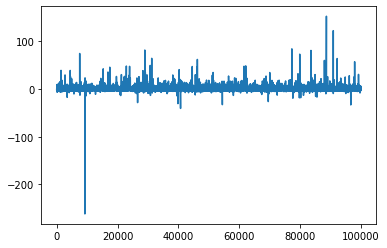

In [8]:
plt.plot(Zs)

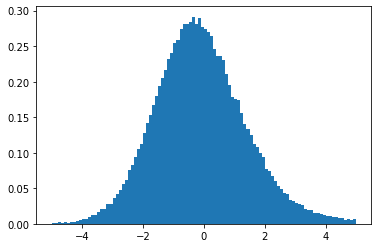

In [9]:
u = matplotlib.pyplot.hist(Zs, density = True, bins = 100, range = (-5, 5))

<p> Empirical distribution function  e.c.d.f  = <p>


In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

In [11]:
ecdf = ECDF(Zs)

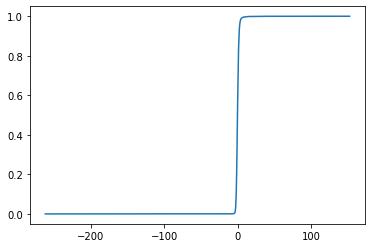

In [14]:
plt.plot(ecdf.x, ecdf.y)

In [15]:
ecdf.x

array([         -inf, -262.11440706,  -40.73023789, ...,   84.28498619,
        122.5181757 ,  152.73560061])

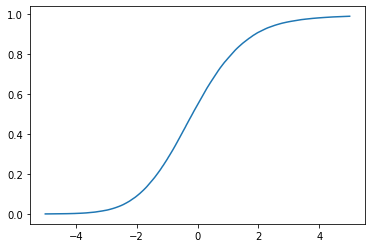

In [24]:
xnew = []
ynew = []
for i in range(len(ecdf.x)):
    if ecdf.x[i] >= -5 and ecdf.x[i] <= 5:
        xnew.append(ecdf.x[i])
        ynew.append(ecdf.y[i])

plt.plot(xnew, ynew)